# **Lab 7 - Simplifying the Development of LLM-powered Applications with Langchain**

In this lab, we move from individual model calls to **structured AI workflows**.

Using LangChain as a higher-level abstraction over the OpenAI Responses API,
we focus on how prompts, models, and intermediate results can be composed
into **reusable, multi-step pipelines**.

These patterns represent foundational concepts that are commonly used in
agentic workflows, **without introducing agents themselves**.


Having learnt about the usage of the OpenAI API, this notebook introduces LangChain. LangChain is
an open source framework for **simplifying the development of applications** powered by **large language models (LLMs)**.

It provides a set of tools and abstractions to make it easier to build complex workflows, integrating LLMs with external data sources, APIs, and databases.



## **Using LangChain with OpenAI**

In a first step we will explore how to use LangChain with OpenAI.

To get started we install the **LangChain library** and its **OpenAI-specific integrations** in your Python environment.

In [ ]:
!pip install -qU langchain-openai langchain langchain_community


## **Securely Handling Sensitive Data in Colab**

To use OpenAI's GPT models the API key needs to be set up.


When working with sensitive information like API keys or passwords in Google Colab, it's crucial to handle data securely. Two common approaches for this are using **Colab's Secrets Manager**, which stores and retrieves secrets without exposing them in the notebook, and `getpass`, a Python function that securely prompts users to input secrets during runtime without showing them. Both methods help ensure your sensitive data remains protected.

### **Option 1: Using Google Colab Secrets Manager**

Google Colab provides an integrated Secrets Manager, allowing you to securely store and retrieve sensitive information such as API keys or authentication tokens without hardcoding them in your notebook.

**Step 1: Store Your Secret in Colab**

1.   In the Colab notebook, navigate to the left sidebar.
2.   Click on the **“Secrets”** tab (represented by a key icon).
3. Add your secret by clicking on **“+ Add a new secret”**. For example, you might add a secret called `OPENAI_API_KEY` with the value of your API key.

**Step 2: Access the Secret in Your Notebook**

Once you've added a secret, you can easily access it from within the notebook.

`OPENAI_API_KEY` is the name of the secret you've added in the Colab Secrets Manager. It will be retrieved securely without having to expose the key in the notebook.


In [ ]:
import os
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

### **Option 2: Using Python's `getpass` for Secret Input**

Alternatively, the `getpass` module allows you to securely input secrets (e.g., passwords or API keys) during runtime, making sure they're not visible in the notebook output.

Here, the `getpass.getpass` function prompts the user to enter the secret without displaying it as they type, ensuring that sensitive data isn't exposed.

In [ ]:
import getpass
os.environ['OPENAI_API_KEY'] = getpass.getpass()

## **Setting Up OpenAI in LangChain: Configuring GPT Models for Language Processing**

We then create an instance of ChatOpenAI from LangChain's built-in LLM integrations (`llm`), specifying the `model` (e.g., `gpt-4.1-mini`) and other parameters like `temperature` (which controls randomness).


> **Note:** In this lab, LangChain is used as a higher-level abstraction over the OpenAI Responses API. Model calls are handled internally by LangChain's `ChatOpenAI` interface.


In [ ]:
# Step 1: Set up OpenAI LLM
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(temperature=0.9, model="gpt-4.1-mini")

Then we call the `invoke` method of the `llm` (large language model) object to generate a `response` based on the provided prompt. The prompt is "*Tell me a Chinese recipe with ingredients: rice, pork, and vegetables in a textual output format"*. The language model processes the prompt and generates a recipe suggestion as its output.

To display the response in a readable form we will again use Markdown.

In [ ]:
from IPython.display import Markdown

In [ ]:
# Step 2: Invoke the LLM
response = llm.invoke(
    "Tell me a Chinese recipe with ingredients: rice, pork, and vegetables in a textual output format."
)

display(Markdown(response.content))

## **Prompt Templates: Crafting Flexible and Reusable AI Interactions**

Now let's see how we can **structure and reuse prompts** in a flexible and dynamic way using the Prompt Templates feature in LangChain. Prompt Templates help you standardize inputs to language models by defining **templates** that can be **filled with dynamic variables**. This is particularly useful when you want to create consistent prompts that can be adjusted based on user input or specific tasks.

Let's now explore how to create such a prompt template. For this, we define a simple prompt template using `PromptTemplate`, which will format the string to include dynamic variables (like `cuisine` and `ingredients`).

To identify dynamic variables in the prompt template, we enclose them in curly brackets.

To assign a value to the variables in the prompt template, we use `format` to format the prompt.

In [ ]:
from langchain_core.prompts import PromptTemplate

recipe_prompt_template = PromptTemplate.from_template(
    "Tell me a {cuisine} recipe with ingredients: {ingredients}."
)

recipe_prompt = recipe_prompt_template.format(cuisine="Chinese", ingredients = ["rice", "pork", "vegetables"])

Then we use the LLM to generate a response from the prompt. More specifically, by invoking the llm instance we generate the `response` by passing a formatted prompt `(prompt_template.format(cuisine="Chinese", ingredients = ["rice", "pork", "vegetables"]))` to the model.

In [ ]:
# Step 2: Invoke the LLM
response = llm.invoke(recipe_prompt)
display(Markdown(response.content))

## **Chains: The Building Blocks of Dynamic AI Workflows**

For simple and standalone tasks, it makes sense to invoke a formatted prompt (e.g., `recipe_prompt`) directly using the `invoke` method as demonstrated in the previous section.

However, when the prompt is part of a larger workflow or reusability is a concern, **LangChain Expression Language (LCEL)** provides a more powerful and flexible way to build chains. LCEL lets you combine components such as a prompt template, large language models (LLM), and output parsers using the **|** (pipe) operator. This creates a **Runnable chain** that cleanly separates prompt construction from model invocation. The result is a modular, readable, and maintainable workflow.

The next line creates a runnable chain that will format the prompt dynamically using the template and send it to the language model.

* `recipe_prompt_template`: Refers to the pre-defined PromptTemplate that contains placeholders for dynamic inputs (e.g., `{cuisine}` and `{ingredients}`).

* `llm`: Refers to the language model.


In [ ]:
# Step 1: Create the chain
chain = recipe_prompt_template | llm

`chain.invoke(...)`: Fills in the placeholders in the `recipe_prompt_template` with the provided arguments (`{"cuisine": "Chinese", "ingredients": "rice, pork, vegetables"}`) and sends the formatted prompt to the language model for processing. The LLM generates a response (e.g., a recipe), which is stored in the `response` variable, which is then displayed.

In [ ]:
# Step 2: Run the chain
response = chain.invoke({"cuisine": "Chinese",
    "ingredients": "rice, pork, vegetables"})

display(Markdown(response.content))

### **Multi-Step Workflows with LCEL: Building Sequential Chains the Modern Way**

In LangChain’s modern architecture, complex workflows are built using LCEL. LCEL lets you compose multiple steps-prompts, models, output parsers, and even custom functions-into a clean, readable pipeline.

To build workflows where the result of one step becomes the input to the next, we use `RunnablePassthrough` combined with the `assign()` method. This creates a structured, multi-stage chain where each step adds new fields to the running dictionary of values.

This approach keeps every stage:

* **Modular:** each prompt + model combo is its own runnable.
* **Composable:** steps connect naturally through variable passing.
* **Transparent:** you can inspect intermediate outputs.
* **Modern:** built on the recommended LCEL pattern.

We will now create a sequential chain for recipe generation.

*   **Input Variables:**
  * `cuisine` and `ingredients` are the initial inputs for the sequential chain.

*   **Step 1: Dish Generation**
  * A prompt template (`dish_template`) is created to suggest a dish based on the given cuisine and ingredients.
  * The output of this step is the `dish` name, which will be passed to the next step.

* **Step 2 - Outline Creation:**
 * The output from the first step (`dish`) is passed as an input to the second prompt (`outline_template`), where a step-by-step outline for preparing the dish is created.
 * The output of this step is the `outline`.

* **Step 3 - Recipe Writing:**
  * The output from the second step (`outline`) is used as input in the third prompt (`recipe_template`) to generate a recipe.
  * The output of this step is the `recipe`.

* **Connections:**
  * `cuisine` + `ingredients` → `dish`
  * `dish` → `outline`
  * `outline` → `recipe`

A visualization of this sequential chain (`dish_generation_chain`) is depicted below.

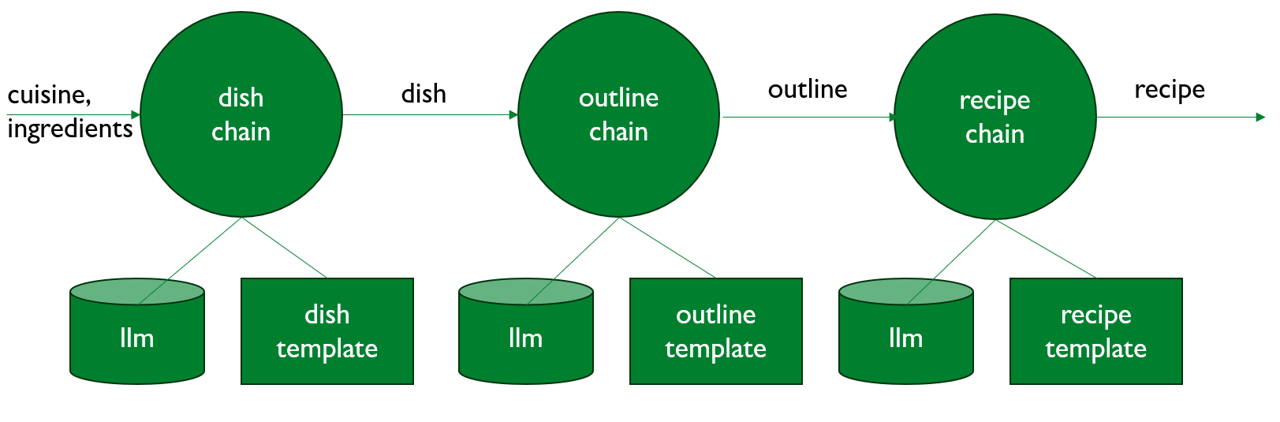

In [ ]:
# Step 1: Create the chain
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0, max_tokens=8000)

dish_prompt = PromptTemplate(
    input_variables=["cuisine", "ingredients"],
    template=(
        "Suggest a dish for {cuisine} cuisine using these ingredients: {ingredients}. "
        "Provide only the dish name and the ingredients."
    ),
)

outline_prompt = PromptTemplate(
    input_variables=["dish"],
    template="Create a step-by-step outline for preparing the dish: {dish}.",
)

recipe_prompt = PromptTemplate(
    input_variables=["outline"],
    template="Write a detailed recipe based on the following outline:\n\n{outline}",
)

dish_generation_chain = (
    RunnablePassthrough()
    .assign(dish=dish_prompt | llm | StrOutputParser())
    .assign(outline=outline_prompt | llm | StrOutputParser())
    .assign(recipe=recipe_prompt | llm | StrOutputParser())
)

Let's now run the chain for an Italian recipe with tomatoes, basil, mozzarella, and olive oil.

In [ ]:
# Step 2: Run the chain
response = dish_generation_chain.invoke({
    "cuisine": "Italian",
    "ingredients": "tomatoes, basil, mozzarella, olive oil"
})

Let's display the output of each individual step:

In [ ]:
display(Markdown(response["dish"]))

In [ ]:
display(Markdown(response["outline"]))

In [ ]:
display(Markdown(response["recipe"]))

If you are not up for an Italian recipe then just re-run the chain with other input parameters. Notice how you do not need to change anything in the chain definition, but only the input parameters.

In [ ]:
# Step 2 (alternative): Run the Chain
response = dish_generation_chain.invoke({
    "cuisine": "Mexican",
    "ingredients": "tomatoes, cheese, corn tortillas, onions"
})

In [ ]:
display(Markdown(response["dish"]))

In [ ]:
display(Markdown( response["outline"]))

In [ ]:
display(Markdown(response["recipe"]))

## **Configuring and adapting LLM workflows with LangChain**

### **Key configuration levers: models, prompts, and parameter**

LangChain allows you to adapt LLM-powered workflows to different use cases by separating workflow logic from model configuration. This makes it possible to adjust models, prompts, and parameters without changing the overall structure of an application.

Key configuration levers include:

* **Model selection:** Different tasks benefit from different models. LangChain makes it easy to switch between proprietary models (such as **gpt-4.1** or **gpt-4.1-mini**), models from providers like **Google Gemini**, and open-source models available via **Hugging Face** (for example **DeepSeek** or **LLaMA**).

* **Prompt templates:** Prompt templates can be adapted to control **style**, **tone**, and **context**. Small changes in prompt structure often have a significant impact on output quality, especially in multi-step workflows.

* **Parameter tuning:** Parameters such as **temperature** influence how deterministic or creative a model's responses are. Lower values produce more focused and consistent outputs, while higher values increase variability and creativity.

> **Note:** Not all models support all generation parameters. In particular, some newer GPT-5 family models do not expose or meaningfully use the `temperature` parameter. When working with such models, output variability may be controlled internally by the model rather than through user-defined sampling parameters.

* **Unified interface across models:** LangChain provides a unified interface for working with multiple model providers. This allows workflows to remain largely unchanged while experimenting with different models or providers, reducing vendor lock-in and enabling flexible system design.

Together, these configuration options make it possible to adapt and extend workflows as requirements evolve, without rewriting core application logic.

**Important Note on API Keys:**
API keys are required for each model you use, but they can be obtained for experimentation without any charges. Usage of these models is optional, and you can choose which models to try out based on your preferences and needs.

### **Google Integration with LangChain**

The following examples illustrate how the same workflow and prompt templates can be reused while changing the underlying model provider.

Let's see how easy it is to switch from OpenAI and use the Google Gemini series of models.

#### **Step 1: Get you API Key**

A free Google AI API key can be obtained from: https://ai.google.dev/gemini-api/docs/api-key?hl=de.

You can either store it as new secret (`GOOGLE_API_KEY`) or use the `getpass` module as explained in the section on how to handle sensitive data.

#### **Step 2: Use the API Key**

In [ ]:
2# Uncomment when using passcode to be prompted to enter your API Key
# In this case, remember to comment the line for using Colab Secrets Manager
# os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

# When using Colab Secrets Manager: Retrieve Google API key
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

#### **Step 3: Install Google Integration**

In a first step the Google integration for LangChain needs to be installed.

In [ ]:
%pip install -qU langchain-google-genai

#### **Step 4: Using Gemini-2.5-Flash to Generate Recipe**


* **Reuse the Original Recipe Prompt Template:** You will use the `recipe_prompt_template` to create a recipe based on `cuisine` and `ingredients`, just as before.

* **Switch Model to gemini-2.5-flash:** Instead of using OpenAI, you will now switch the model to `gemini-2.5-flash`. You can achieve this by adjusting the model initialization to use Gemini.

* **Connect the Prompt Template and Model in a Chain:** You will connect the `recipe_prompt_template` with the `gemini-2.5-flash` model in a LangChain chain, then run the chain to generate a recipe response.


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

# Step 1: Switch to Google model
google_llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=8000, # max=8192
    timeout=None,
    max_retries=2,
    # other params...
)

# Step 2: Create the chain
chain = recipe_prompt_template | google_llm

In [ ]:
# Step 3: Run the Chain
response = chain.invoke({"cuisine": "Swiss",
    "ingredients": "rice, pork, vegetables"})

display(Markdown(response.content))

### **Hugging Face Integration with LangChain**

Hugging Face provides access to open-source, pre-trained models.
These models can be used either locally (with sufficient hardware)
or via Hugging Face's hosted inference services.

This section demonstrates how LangChain can switch between proprietary
ML APIs and open-source models using a provider-based, unified interface. HuggingFace integration allows LangChain workflows to be extended to
**open-source, pre-trained models** available through the Hugging Face Model Hub.
This enables the use of a wide range of models for tasks such as text generation, summarization, translation, and classification, without building models from scratch.

Using open-source models introduces different **design trade-offs** compared to
proprietary APIs. While these models offer greater transparency, flexibility,
and customization—including the ability to fine-tune or inspect model internals—they also require more careful consideration of infrastructure requirements, model compatibility, and parameter support.

Open-source models can be used in two main ways:

- **Inference:** Applying pre-trained models directly to tasks such as text
  generation or summarization via local pipelines or hosted endpoints.
- **Fine-tuning:** Adapting models to specific domains or datasets for improved
  performance.

For larger and more capable models, local execution often exceeds the limits of
free-tier environments. In such cases, Hugging Face's hosted inference endpoints provides a practical alternative by allowing access to powerful models in the cloud without managing local hardware.

LangChain acts as a *provider abstraction layer** across proprietary ML APIs and
open-source models, allowing workflows to switch between providers with minimal
changes to code or prompt structure.

> **Note on parameters:** Open-source models accessed via Hugging Face service provider do not always support the same generation parameters as proprietary APIs. Parameters such as `temperature`, maximum token length, or sampling behavior may be handled differently depending on the model and the inference backend or provider configuration. When working with open-source models, it is important to verify which parameters are supported and how they affect output quality.



#### **Using Hugging Face Models for More Complex Tasks**

For more complex tasks—such as multi-step text generation or detailed recipe creation—larger models are typically required. Smaller models (for example, GPT-2 or other lightweight architectures) often lack the context retention and generation capabilities needed for such scenarios.

Larger open-source models, when properly configured, are better suited for these tasks. Examples include:

- **DeepSeek:** Well suited for tasks requiring strong contextual understanding and coherent multi-step outputs.
- **LLaMA:** Strong performance in text generation and instruction-following tasks, particularly for longer or more detailed inputs.

To use such models without local infrastructure constraints, it is often most practical to access them via Hugging Face's hosted inference endpoints. This allows workflows developed with LangChain to remain unchanged while experimenting with different open-source models through the same provider abstraction.

In the following steps, we demonstrate how to connect LangChain to Hugging Face models using the Hugging Face service provider and reuse the same prompt templates and workflow structure introduced earlier.

> **Operational requirement:** To use models via Hugging Face's hosted inference services, an, an API access token is required.
>
> You can create a free Hugging Face account and generate an access token at:  
> https://huggingface.co/settings/tokens
>
> For the examples below, the token should be stored as an environment variable (for example, `HF_TOKEN`), either via a secrets manager or by entering it manually as shown in the following steps.


#### **Step 1: Setting Up Your HuggingFace Account and Hosted Inference Access**

To access powerful models via Hugging Face's hosted inference services, you need to create a HuggingFace account, generate an access token, and configure your account properly.

**Step 1.1: Create a HuggingFace Account**

Navigate to https://huggingface.co/ and sign up to create a free account.

**Step 1.2: Generate Your HuggingFace API Access Token**

Login and navigate to your account settings. For this, once logged in, go to your profile (click on your username in the top-right corner) and select **Settings** from the dropdown menu.

* In the **Settings** page, scroll down to the **Access Tokens** section and
* Click **New Token**.
* Choose the **token scope** you need (for hosted inference access, Read access is sufficient).
* Click **Generate Token**.

**Step 1.3: Configure the Access Token in Your Code**

You can either store it as new secret (`HF_TOKEN`) or use the `getpass` module as explained in the section on how to handle sensitive data.

#### **Step 2: Use the API Key**

In [ ]:
# Uncomment when using passcode to be prompted to enter your API Key
# os.environ["HF_TOKEN"] = getpass.getpass("Enter your Google AI API key: ")

# When using Colab Secrets Manager: Retrieve COHERE API key
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')

#### **Step 3: Install HuggingFace Integration**

In a first step the HuggingFace service provider integration for LangChain needs to be installed.

In [ ]:
!pip install -q langchain-huggingface

#### **Step 4: Using HuggingFace to Generate Recipes**

In this section, we will use the **HuggingFace integration** to access conversational models for **text generation** via hosted inference endpoints, specifically through the **HuggingFaceEndpoint**.

You can experiment with different models such as:
* `deepseek-ai/DeepSeek-R1`
* `openai/gpt-oss-120b`
* `google/gemma-2-2b-it`.

**Important Notes on Model Access:**
**Gated Models:** Some models, such as Llama variants, are gated. This means that to gain access to them, you may need to provide additional information, such as sharing your contact details or submitting a request for access.

**Pro Account Requirement:** Certain large models, including some advanced versions of  LLama, may require a HuggingFace Pro account due to their high computational demands or may not be available via Hugging Face's hosted inference services at all and instead require third-party inference providers.


In [ ]:
# Step 1: Switch to HF
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint

llm = HuggingFaceEndpoint(
  #repo_id="deepseek-ai/DeepSeek-R1", # Powerful reasoning based open large language model
  #repo_id="openai/gpt-oss-120b", # Great text generation model with top-notch tool calling capabilities
  #repo_id="zai-org/GLM-4.5", # Powerful text generation model
  #repo_id="Qwen/Qwen3-4B-Thinking-2507", # A powerful small model with reasoning capabilities
  #repo_id="google/gemma-2-2b-it", # A text-generation model trained to follow instructions
  repo_id="meta-llama/Meta-Llama-3-8B-Instruct",
  huggingfacehub_api_token = os.getenv("HF_TOKEN"),
)

hf = ChatHuggingFace(llm=llm)

In [ ]:
# Step 2: Create the chain
chain = recipe_prompt_template | hf

In [ ]:
# Step 3: Run the Chain
response = chain.invoke({"cuisine": "Swiss",
    "ingredients": "rice, pork, vegetables"})

display(Markdown(response.content))

## **Connecting LLM workflows to external data and tools**

So far, our workflows have operated primarily on user-provided input. In practice, LLM-powered applications often need to ingest external data or operate on information that exists outside the prompt itself. LangChain provides abstractions such as **loaders** and **tools** that make it possible to integrate external data sources into workflows while keeping the overall workflow structure unchanged.


In this section, we focus on **data loaders**, which allow external data to be transformed into a consistent document format that can be used across LLM-powered workflows.

### **What are Data Loaders?**

Data loaders are responsible for retrieving data from external sources—such as files, web pages, APIs, or databases—and converting it into LangChain’s internal **document** format. This abstraction allows downstream components (prompts, chains, models) to work with different data sources in a uniform way.


### **Common Types of Loaders**

LangChain provides a variety of data loaders, including:

- **File-based loaders** (e.g., `PDFLoader`, `CSVLoader`)
- **Web-based loaders** (e.g., `WebBaseLoader`, `WikipediaLoader`, `YoutubeLoader`)
- **API loaders**
- **Database loaders**

Regardless of the source, loaders return data in a consistent document format. This makes it easy to reuse the same workflows for tasks such as:
- Summarization
- Question answering
- Information extraction
- Semantic search


### **Loading and Preprocessing CSV Files**

This section demonstrates how to load structured data from a CSV file using LangChain's `CSVLoader`. The loader converts each row of the CSV file into a document object, allowing the data to be used as contextual input in LLM-powered workflows.


#### **Preparing Input Files**

The following examples require local files (such as CSV and PDF documents) to be available in the notebook environment.

If you are running this notebook in Google Colab, you can upload files using the file browser on the left-hand side:
1. Click the **folder icon** to open the file browser.
2. Upload the required files (for example, the CSV file provided on Canvas).
3. Ensure that the file path used in the code matches the upload location (e.g., `/content/sample_data/filename.csv`).

Alternatively, files can be downloaded programmatically using tools such as `wget` if a public URL is available.


#### **Loading a CSV File as Documents**

In this example, we load a small clinical dataset from a CSV file. Each row in the dataset is converted into a separate document.


In [ ]:
from langchain_community.document_loaders import CSVLoader

# Load the CSV content
loader = CSVLoader(file_path="/content/sample_data/heart_failure_clinical_records_small.csv")
docs = loader.load()

In [ ]:
# Inspect the loaded document
docs

The variable `docs` is a list of document objects. Each document represents one row of the CSV file.


In [ ]:
# Check the type of the loaded object
type(docs)


You can inspect the textual content of an individual document using the `page_content` attribute.


In [ ]:
# Inspect the content of the first document
print(docs[0].page_content)


#### **Using the Loaded Documents as Context in LLM Queries**

In the previous section, we loaded a CSV file using LangChain's `CSVLoader`.
The loader returned a list of `Document` objects, stored in the variable `docs`.
Each document represents a portion of the CSV content in textual form.

We now reuse these loaded documents as **context** for an LLM query.
This demonstrates how data loaded from external sources can be passed into
a language model without reloading or reprocessing the file, enabling
multi-step workflows built on shared intermediate results.

LangChain loaders allow structured data (such as CSV files) to be reused
as contextual input for LLMs. However, language models are **not reliable
for exact numerical analysis**. They may hallucinate or approximate values
when asked to perform deterministic computations such as counting,
aggregation, or finding exact minimum and maximum values.



##### **Answering Questions Based on CSV Content Using an LLM**

We start by defining a prompt template that instructs the model to answer questions based only on the provided document content.


In [ ]:
from langchain_core.prompts import PromptTemplate

# Step 1: Define the prompt template
doc_prompt_template = PromptTemplate.from_template(
    "Answer the following question based on the provided document:\n\n"
    "{doc}\n\n"
    "Question: {question}\n"
    "Answer:"
)


Next, we set up a language model and connect it to the prompt template using a LangChain chain.

Here, we deliberately use a **small, fast model (`gpt-4.1-mini`)** to illustrate that LLMs are not well suited for exact numerical computation on structured data.


In [ ]:
# Step 2: Set up OpenAI LLM
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(temperature=0, model="gpt-4.1-mini") # alternatively, use "gpt-5"
chain = doc_prompt_template | llm

Now let's try how well the LLM is at answering questions about the provided document.

In [ ]:
# Step 3: Run the Chain
response = chain.invoke({
    "question": "Give me the minimum age.",
    "doc": docs
})
display(Markdown(response.content))


In [ ]:
# Step 3: Run the Chain
response = chain.invoke({
    "question": "Give me the maximum age.",
    "doc": docs
})
display(Markdown(response.content))


In [ ]:
# Step 3: Run the Chain
response = chain.invoke({
    "question": (
        "Count the number of individuals who have diabetes "
        "(diabetes == 1) and provide the percentage relative "
        "to the entire dataset."
    ),
    "doc": docs
})
display(Markdown(response.content))


##### **Important Observation**

The answers produced by the language model may appear plausible, but they are **not guaranteed to be correct**. Although the model has access to the CSV content as text, it does not perform exact numerical aggregation or deterministic computation.

This example intentionally highlights a **non-ideal usage pattern** of LLMs: asking them to compute precise statistics from structured data.


##### **Validating Results with Pandas (Ground Truth)**

To compute correct and verifiable results, we now use Pandas to analyze the CSV file directly.


In [ ]:
import pandas as pd

df = pd.read_csv("/content/sample_data/heart_failure_clinical_records_small.csv")

min_age = df["age"].min()
max_age = df["age"].max()
diabetes_count = (df["diabetes"] == 1).sum()
overall_count = len(df)
diabetes_percentage = diabetes_count / overall_count * 100

print("Minimum age:", min_age)
print("Maximum age:", max_age)
print("Number of diabetic individuals:", diabetes_count)
print("Total individuals:", overall_count)
print("Diabetes percentage:", round(diabetes_percentage, 2), "%")


##### **Key Takeaway**

LangChain loaders allow structured data (such as CSV files) to be reused as contextual input for LLMs. However, language models should not be relied upon for exact numerical analysis.

A robust workflow combines:
- **Deterministic tools** (e.g., Pandas) for computation
- **LLMs** for explanation, interpretation, and reasoning over results

This distinction is critical when designing reliable LLM-powered applications.


### **Loading and Processing PDF Files**

In this section, we demonstrate how to load unstructured text from PDF documents and use an LLM to **extract structured information**. Unlike CSV files, PDFs typically contain free-form text, making them a good example of where LLMs add significant value.


#### **Loading a PDF as Document**

We use `PyPDFLoader` to load a PDF file and split it into individual pages. Each page is represented as a separate document, which allows page-wise processing.


In [ ]:
pip install -q pypdf

> **Important:** Before running the following examples, make sure the PDF file
> 'class-list-emba-68-fiction.pdf' is uploaded to your notebook environment.
> In Colab, upload the file manually or place it in '/content/sample_data/'.

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

#Load a PDF file that has already been uploaded to the notebook environment
loader = PyPDFLoader("/content/sample_data/class-list-emba-68-fiction.pdf")
pages = loader.load()

pages[0]


#### **Extracting Structured Information from PDF Content**

Next, we use an LLM to extract structured information from each page.  
The goal is to convert unstructured text into a JSON representation containing participant details.


In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
import json

llm = ChatOpenAI(model="gpt-4.1")

template = """
You are given text containing course participant information.

Extract the information and return a JSON object with the following fields:
- Name
- Job Role
- Company
- E-Mail

Return valid JSON only, without any additional text.

TEXT:
{doc_text}
"""

prompt = PromptTemplate(template=template, input_variables=["doc_text"])
llmchain = prompt | llm


In [ ]:
participant_data = []

for page in pages:
    response = llmchain.invoke({"doc_text": page.page_content})
    data = response.content.strip().replace("```json", "").replace("```", "")
    participant_data.append(json.loads(data))


#### **Enriching Extracted Data with Additional LLM Calls**

Once structured data has been extracted, we can enrich it using additional LLM queries.  
In this example, we retrieve background information about each participant’s company.


In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from IPython.display import Markdown, display

company_prompt = PromptTemplate(
    input_variables=["company_name"],
    template=(
        "Provide a brief overview of the company '{company_name}', "
        "including its industry, main products, and notable facts. "
        "Exclude financial information. Limit to 50 words."
    )
)

company_chain = company_prompt | ChatOpenAI(model="gpt-4.1")


We iterate through the people in the document and run the chain for each of them to obtain the company information.

We print the person details, along with the detailed company information we obtained.

In [ ]:
# Loop through the data and extract useful information
for group in participant_data:
    for person in group:

        # Run the chain with a company name (for example, "Apple")
        response = company_chain.invoke({"company_name": {person['Company']}})

        # Print extracted information
        display(Markdown("Name: " + person['Name']))
        display(Markdown("Job Role: " + person['Job Role']))
        display(Markdown("E-Mail: " + person['E-Mail']))
        display(Markdown("Company: " + person['Company']))
        display(Markdown("Company Details: " + response.content))
        display(Markdown("-" * 40))

#### **Reusing Extracted Data as Context for LLM Queries**

Finally, we can reuse the structured data extracted from the PDF as contextual input for further LLM queries.  
This demonstrates how data can be **loaded once, transformed, and reused across multiple workflow steps**.


In [ ]:
response = chain.invoke({
    "question": "What company does Tim Apple work for?",
    "doc": participant_data
})
display(Markdown(response.content))

response = chain.invoke({
    "question": "Where is the company Tim Apple works for located?",
    "doc": participant_data
})
display(Markdown(response.content))


### **Loading and Processing Web Content**


In this section, we demonstrate how to load content from a webpage and process it using LangChain.  
Web content is typically unstructured and lengthy, making it a good candidate for LLM-based summarization and cleanup workflows.


##### **Loading a Webpage as a Document**

LangChain provides the `WebBaseLoader` to fetch and parse the content of a webpage.  
The loader converts the webpage into a list of documents that can be processed by downstream chains.


In [ ]:
from langchain_community.document_loaders import WebBaseLoader
loader = WebBaseLoader("https://www.authentikusa.com/en/blog/big-bend-national-park-guide")


If a website uses an invalid or self-signed SSL certificate, SSL verification can be disabled.
This is sometimes necessary for experimentation, but should be avoided in production environments.


In [ ]:
loader.requests_kwargs = {'verify':False}

In [ ]:
# Load and split the webpage content into documents
docs = loader.load_and_split()


##### **Summarizing Long Web Content with a Map–Reduce Chain**

Webpages are often long. To summarize them effectively, we use a **map–reduce summarization chain**:

- **Map step:** Each document chunk is summarized individually  
- **Reduce step:** The partial summaries are combined into a final summary

This pattern allows LLMs to handle long inputs that would otherwise exceed context limits.


In [ ]:
from langchain_openai import ChatOpenAI
from langchain_classic.chains.summarize import load_summarize_chain
from IPython.display import Markdown, display


In [ ]:
# Initialize a lightweight model suitable for summarization
llm = ChatOpenAI(model="gpt-4.1-mini")

# Create a summarization chain using map-reduce

summarize_chain = load_summarize_chain(
    llm,
    chain_type="map_reduce"
)


> **Note on `load_summarize_chain`**
>
> The function `load_summarize_chain` comes from LangChain’s classic chain library.
> It provides a **prebuilt, multi-step summarization workflow** so you don’t need to
> manually define each step of the process.
>
> Internally, this chain orchestrates multiple LLM calls (for example using a
> map–reduce strategy) while abstracting away the underlying model API calls.
> This makes it ideal for teaching and rapid prototyping.


In [ ]:
# Run the summarization chain
summary = summarize_chain.invoke(docs)

display(Markdown("### Summary"))
display(Markdown(summary["output_text"]))


#### **LLM-based Document Content Cleaning**

In addition to summarization, LLMs can be used to clean and normalize raw text.
This can be useful when preparing data for downstream tasks such as indexing, search, or further analysis.


In [ ]:
from langchain_core.prompts import PromptTemplate

In [ ]:
cleaning_prompt_template = PromptTemplate(
    input_variables=["document"],
    template=(
        "Clean the following text by removing unwanted characters, "
        "normalizing whitespace, and replacing multiple spaces or "
        "line breaks with a single space:\n\n{document}"
    )
)


In [ ]:
# Create a cleaning chain
cleaning_chain = cleaning_prompt_template | llm


In [ ]:
# Apply cleaning to the loaded documents
cleaned_documents = cleaning_chain.invoke(docs)

display(Markdown("### Cleaned Content"))
display(Markdown(cleaned_documents.content))


Web loaders enable LLM workflows to operate on live, unstructured web content.
By combining loaders with summarization and transformation chains, LangChain allows you to:

- Process long documents safely
- Extract concise summaries
- Normalize and clean raw text
- Reuse content across multiple workflow steps


### **Loading and Parsing the Transcript of a YouTube video**

In this example, we use LangChain’s `YoutubeLoader` to extract and process the transcript of a YouTube video.
The transcript is loaded as a document and then summarized using the same summarization chain introduced earlier.


In [ ]:
%pip install --upgrade --quiet  youtube-transcript-api

We first import the required loader:
- **`YoutubeLoader`** extracts transcripts from YouTube videos and converts them into LangChain documents.


In [ ]:
from langchain_community.document_loaders import YoutubeLoader

The `from_youtube_url` method retrieves the transcript from the specified video.
Setting `add_video_info=False` means that only the transcript text is loaded, without additional metadata.


In [ ]:
# Step 1: Load and parse the YouTube transcript
loader = YoutubeLoader.from_youtube_url(
    "https://www.youtube.com/watch?v=Lbt_eIdzHf8",
    add_video_info=False
)

video_docs = loader.load()


Next, we reuse the **same summarization chain** created earlier for web content.
This highlights an important LangChain concept: **once a chain is defined, it can be reused across different data sources**.


In [ ]:
# Step 2: Summarize the YouTube transcript
summary = summarize_chain.invoke(video_docs)

display(Markdown("### Summary"))
display(Markdown(summary["output_text"]))


### **Loading Content from Wikipedia**

LangChain also provides loaders for structured knowledge sources such as Wikipedia.
The `WikipediaLoader` retrieves content from a specified page and converts it into document objects.


In [ ]:
!pip install -q wikipedia

In [ ]:
from langchain_community.document_loaders import WikipediaLoader

# Load content from Wikipedia using WikipediaLoader
loader = WikipediaLoader("Machine_learning")
document = loader.load()
display(Markdown(document[0].page_content))

### **Key Takeaway**

Data loaders allow LLM-powered workflows to connect to a wide range of external data sources,
including websites, videos, PDFs, CSV files, and knowledge bases like Wikipedia.

By converting diverse inputs into a **consistent document format**, LangChain enables:
- reuse of prompt templates and chains
- consistent processing across data types
- flexible, modular workflow design

This abstraction is a core reason why LangChain scales well from simple examples to real-world applications.


## **Tools: Connecting LLM Workflows to External Capabilities**

So far, we have built workflows that operate on text and documents.  
In practice, many LLM-powered applications need to interact with **external systems** such as search engines, APIs, or deterministic computation functions.

In LangChain, **tools** provide a structured way to expose external functionality to LLM workflows.

In this lab:
- Tools are invoked **explicitly**
- Tools are **not** selected autonomously by the model
- No agents are used


### Google Serper: Web Search as a Tool

Google Serper provides programmatic access to Google Search results.
It allows workflows to retrieve **up-to-date web information**, which is especially useful when LLM knowledge may be outdated.


#### **Step 1: Get you API Key**

First you need to sign up for a free account at https://serper.dev/ and add it to your secrets.



#### **Step 2: Use API Key**

In [ ]:
os.environ["SERPER_API_KEY"] = userdata.get('SERPER_API_KEY')
#When using getpass
#os.environ['SERPER_API_KEY'] = getpass.getpass()

#### **Step 3: Perform a Google Search using Serper API**

In [ ]:
from langchain_community.utilities import GoogleSerperAPIWrapper

search = GoogleSerperAPIWrapper()

result = search.run("Obama's first name?")

print(result)

This example introduces the core idea of tools in LangChain:
**external capabilities that can be explicitly invoked as part of a structured LLM workflow**.

Here, the tool is used in isolation, representing a **single-step pipeline**.
Earlier in this notebook, you have seen how multiple steps—such as loaders,
prompt templates, and model calls—can be combined into more complex workflows.
Tools can be integrated into those workflows in the same way.

### **Deterministic Tools: Ensuring Correctness**

Not all tools provide external knowledge.
Some tools are used to ensure **correctness** by performing deterministic computations.

Language models should not be relied upon for precise numerical calculations.
For such tasks, LangChain tools can wrap **deterministic Python functions**.


In [ ]:
from langchain_classic.agents import Tool

In [ ]:
def calculate_average(values):
    return sum(values) / len(values)

In [ ]:
average_tool = Tool(
    name="AverageCalculator",
    func=calculate_average,
    description="Calculates the exact average of a list of numerical values."
)


#### **LLM → Tool → Explanation Workflow**

In this workflow:
1. A deterministic tool computes an exact value
2. An LLM explains the result in natural language


In [ ]:
from langchain_openai import ChatOpenAI
from IPython.display import Markdown, display

values = [72, 65, 81, 90, 76]
average_value = average_tool.func(values)

In [ ]:
llm = ChatOpenAI(model="gpt-4.1-mini")

response = llm.invoke(
    f"The average of the values {values} is {average_value}. "
    "Explain what this number means in simple terms."
)

display(Markdown(response.content))


### **Key Takeaway**

Tools extend LLM workflows beyond text generation.

- Some tools provide **external knowledge** (e.g., web search)
- Others provide **deterministic correctness** (e.g., calculations)
- Robust applications combine:
  - deterministic tools for computation
  - LLMs for explanation and interpretation



### **Summary**
The patterns shown in this lab—prompt templates, chains, loaders, and tools—
illustrate how ML APIs and pre-built AI models can be composed into
structured workflows.

These workflows reflect the architectural principles discussed in the lecture
and form the foundation for more advanced AI systems.